# Customer Churn Prediction in Telecom Industry

Created by **Marcus Fernandes**.
- [LinkedIn](https://www.linkedin.com/in/marcus-fernandes1/)
- [GitHub](https://github.com/marcus-fernandes1)

## Project Overview

This project explores customer churn in the telecom sector. The goal is to identify patterns and key indicators of churn using exploratory data analysis (EDA). Insights aim to support customer retention strategies by understanding behavior and risk factors.

### Dataset
[The dataset](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/data) contains customer details including demographics, services subscribed, tenure, and churn status.

### Objectives
- Identify variables correlated with churn
- Visualize customer behavior and segment patterns
- Generate actionable insights for retention efforts

## Importing the libraries

In [1]:
# importing the necessary libraries
import pandas as pd
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

## Data overview
- The file 'churn-bigml-80.csv' will be used for training the models.
- The file 'churn-bigml-20.csv' will be used for testing the models.

In [2]:
# Loading the data
cwd = os.getcwd()
churn_train = pd.read_csv(cwd + '/Data/churn-bigml-80.csv')
churn_test = pd.read_csv(cwd + '/Data/churn-bigml-20.csv')

### View the first 5 rows of the datasets

In [3]:
churn_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
churn_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### Understand the features

In [5]:
print(churn_train.columns.tolist())

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


| Feature                | Description                                                   |
|------------------------|---------------------------------------------------------------|
| State                  | The US state where the phone plan is hired.                   |
| Account length         | The number of months the customer has stayed with the company.|
| Area code              | A set of digits that identifies a particular telephone service area within a state. |
| International plan     | Identifies if the particular customer makes calls outside the US. |
| Voice mail plan        | Identifies if the particular customer uses the voice messages service. |
| Number vmail messages  | Number of voice mail messages.                                |
| Total day minutes      | Total daily call minutes for the particular customer.         |
| Total day calls        | Total daily calls for the particular customer.                |
| Total day charge       | Total daily charged fees for the particular customer.         |
| Total eve minutes      | Total call minutes made in the evening.                       |
| Total eve calls        | Total number of calls made in the evening.                    |
| Total eve charge       | Total charged fees for calls made in the evening.             |
| Total night minutes    | Total call minutes made in the night.                         |
| Total night calls      | Total number of calls made in the night.                      |
| Total night charge     | Total charged fees for calls made in the night.               |
| Total intl minutes     | Total international call minutes made.                        |
| Total intl calls       | Total number of international calls.                          |
| Total intl charge      | Total charged fees for international calls.                   |
| Customer service calls | Total number of customer service calls.                       |
| Churn                  | If the client churned or not.                                 |


In [6]:
if not churn_train.columns.tolist() == churn_test.columns.tolist():
    print('The tables are not equal in terms of number and order of features.')
else:
    print('The tables are equal in terms of number and order of features.')

The tables are equal in terms of number and order of features.


The column names are standardized.

### Understand the shape of the dataset.

In [7]:
print('Train dataset')
print('Number of rows: ', churn_train.shape[0])
print('Number of features (columns): ', churn_train.shape[1])

print('\nTest dataset')
print('Number of rows: ', churn_test.shape[0])
print('Number of features (columns): ', churn_test.shape[1])

Train dataset
Number of rows:  2666
Number of features (columns):  20

Test dataset
Number of rows:  667
Number of features (columns):  20


### Check and correct the data types of the columns for the dataset.

In [8]:
churn_train.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [9]:
churn_test.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

- The dataset is composed mainly by integers and floats. These are valid data types for those variables.
- The variables 'State', 'International plan', and 'Voice mail plan' are of type 'object'. The type will be converted to 'category' for the first one and 'boolean' for the remaining two because it reduces the data space required to store the dataframe.
- The variable 'churn' is of type 'boolean', which is correct.

In [10]:
# Converting 'State' to category by using astype()
churn_train['State'] = churn_train['State'].astype('category')
churn_test['State'] = churn_test['State'].astype('category')

# Converting 'International plan' to category by using astype()
churn_train['International plan'] = churn_train['International plan'].astype('category')
churn_test['International plan'] = churn_test['International plan'].astype('category')

# Converting 'Voice mail plan' to category by using astype()
churn_train['Voice mail plan'] = churn_train['Voice mail plan'].astype('category')
churn_test['Voice mail plan'] = churn_test['Voice mail plan'].astype('category')

In [11]:
churn_train.dtypes

State                     category
Account length               int64
Area code                    int64
International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
dtype: object

In [12]:
churn_test.dtypes

State                     category
Account length               int64
Area code                    int64
International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
dtype: object

The data types are standardized.

### Check for missing values

In [13]:
churn_train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
churn_test.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There are no missing values.

### Check for duplicates

In [15]:
churn_train.duplicated().sum()

0

In [16]:
churn_test.duplicated().sum()

0

There are no duplicated rows.

### Data Cleaning Summary

- Loaded training and test datasets from CSV files (`churn-bigml-80.csv` and `churn-bigml-20.csv`)
- Verified column names and inspected the first few rows with `.head()`
- Reviewed data types and general structure
- Ensured categorical features (e.g., `State`, `International plan`, `Voice mail plan`) were properly formatted as categorical type
- Checked for missing or duplicated values - no problem identified

## Exploratory Data Analysis

To be performed on the train dataset.

### Univariate Analysis

In [17]:
# Statistical summary for boolean variables
set_option('display.width', 100)
set_option('display.precision', 2)
churn_train.describe(include=['bool'])

,Churn
count,2666
unique,2
top,False
freq,2278


2278 customers, or **85.4%, did not churn** (False). Therefore, **14.6% of the customers are churners.**

In [18]:
# Statistical summary for category variables
set_option('display.width', 100)
set_option('display.precision', 2)
churn_train.describe(include=['category'])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


- The dataset covers customers from **51 different U.S. states**, with **West Virginia (WV)** being the most represented (88 customers).
- A large majority of customers **do not have an international plan**, around 90%.
- **About 73%** of customers **do not have a voice mail plan**. 

In [19]:
# Statistical summary for numeric variables
set_option('display.width', 100)
set_option('display.precision', 2)
churn_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00
mean,100.62,437.44,8.02,179.48,100.31,30.51,200.39,100.02,17.03,201.17,100.11,9.05,10.24,4.47,2.76,1.56
std,39.56,42.52,13.61,54.21,19.99,9.22,50.95,20.16,4.33,50.78,19.42,2.29,2.79,2.46,0.75,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.70,33.00,1.97,0.00,0.00,0.00,0.00
25%,73.00,408.00,0.00,143.40,87.00,24.38,165.30,87.00,14.05,166.93,87.00,7.51,8.50,3.00,2.30,1.00
50%,100.00,415.00,0.00,179.95,101.00,30.59,200.90,100.00,17.08,201.15,100.00,9.05,10.20,4.00,2.75,1.00
75%,127.00,510.00,19.00,215.90,114.00,36.70,235.10,114.00,19.98,236.47,113.00,10.64,12.10,6.00,3.27,2.00
max,243.00,510.00,50.00,350.80,160.00,59.64,363.70,170.00,30.91,395.00,166.00,17.77,20.00,20.00,5.40,9.00


- The average customer has been with the company for about 100 months, with some staying as long as 243 months (over 20 years).
- 50% of customers have **zero** voicemail messages, while a small group uses it heavily (up to 50 messages).
- Daytime usage has the highest charges and variability, with **day minutes** ranging from 0 to around 350 and corresponding charges up to $59.
- Evening and night minutes show high usage (up to 395 minutes at night).
- The average of the total number of minutes and calls are about the same for evening and night, but the charged fees are around 50% lower at nights.
- **International usage** is generally low, with most customers using 8–12 minutes. Charges rarely exceed $5.
- On average, customers call customer service **1–2 times**, but some have called up to **9 times**, which might indicate frustration or unresolved issues.

- The Account length of the sampled costumers range from 1 to 243 months, with a mean value of 100, which is similar to the median. This can indicate a uniform distribution.
- The variable Area code has at least 25% of data equal to 408, at least 25% equal to 510, a median of 415 and a mean value of 437. This may indicate a problem with this data, as it appears to have way less values as expected, considering that the dataset covers all the US states.

#### Obervations on Churn

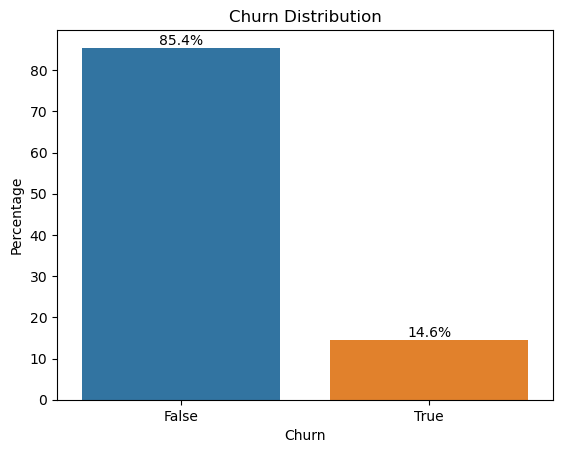

In [20]:
# Plotting the bar and pie charts for the variable Churn.
feature = churn_train['Churn']

feature_count = feature.value_counts()
feature_percentage = feature_count / feature_count.sum() * 100

ax = sns.barplot(x=feature_percentage.index, y=feature_percentage.values)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.xlabel(feature.name)
plt.ylabel('Percentage')
plt.title(feature.name + ' Distribution')
plt.show()

- Around **15% of Orange Telecom customers churned** during the period in which the data was extracted.
- The dataset is imbalanced, as the number of non-churners is almost six times higher than the number of churners.
    - It must be adressed during predictions, as this imbalance may cause bias.

#### Obervations on State

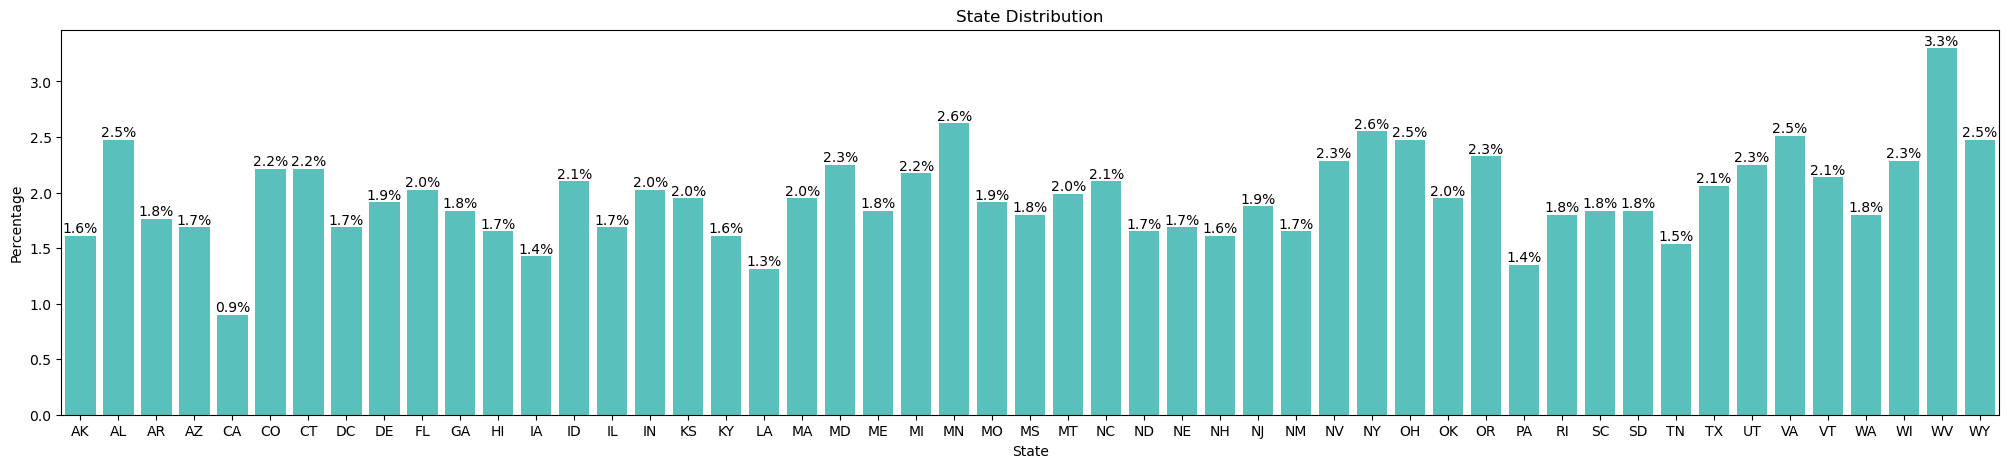

In [21]:
# Plotting the bar chart for the variable State.
feature = churn_train['State']

feature_count = feature.value_counts()
feature_percentage = feature_count / feature_count.sum() * 100

fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(x=feature_percentage.index, y=feature_percentage.values, color='mediumturquoise')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.xlabel(feature.name)
plt.ylabel('Percentage')
plt.title(feature.name + ' Distribution')
plt.show()

- **WV is the state with most customers of the dataset, while CA is the one with the least**.
- This might add bias to the prediction model, because the states have different populations.
- The amount of customers is very similar between the remaining states (from 1.4% to 2.6% of all the data).

#### Obervations on Area code

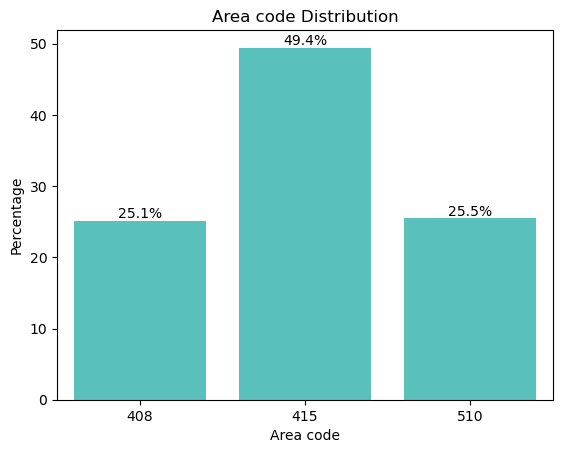

In [22]:
# Plotting the bar chart for the variable Area code.
feature = churn_train['Area code']

feature_count = feature.value_counts()
feature_percentage = feature_count / feature_count.sum() * 100

ax = sns.barplot(x=feature_percentage.index, y=feature_percentage.values, color='mediumturquoise')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.xlabel(feature.name)
plt.ylabel('Percentage')
plt.title(feature.name + ' Distribution')
plt.show()

- **There are only 3 area codes in the dataset**, which doesn't make sense as it covers all the USA's states according to the initial interpretation of what 'Area code' means.
- It could have a different meaning than "a set of digits that identifies a particular telephone service area within a state".
- This suggests that **this dataset can synthetic or anonymized**.
- This variable should be discarded due to the lack of information about it.

### Multivariate Analysis

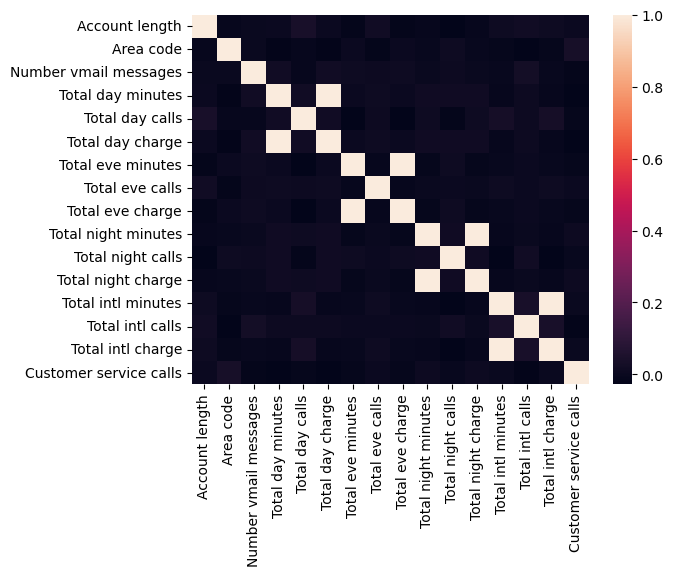

In [23]:
numerical_features = churn_train.select_dtypes(include=np.number)  # selecting numerical features
cormat = numerical_features.corr()
sns.heatmap(cormat)
plt.show()

It is possible to note that there is a high correlation between the variables:
- Total day minutes and Total day charge;
- Total eve minutes and Total eve charge;
- Total night minutes and Total night charge;
- Total intl minutes and Total intl charge.

The charge is calculated using total minutes, therefore these variables can be dropped.

#### Account length, Number vmail messages, and Customer service calls by Churn

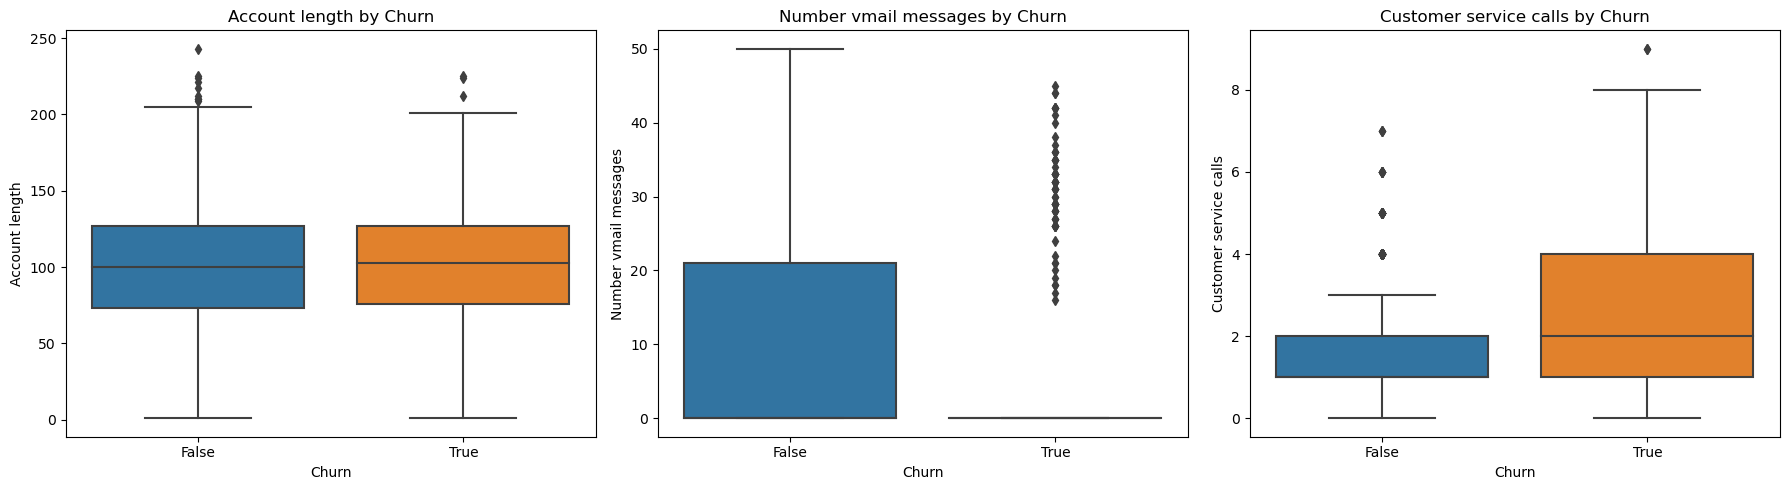

In [24]:
features = ['Account length', 'Number vmail messages', 'Customer service calls']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=churn_train, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Account Length
- The distribution of `Account length` is **very similar** for both churned and retained customers.
- Therefore, how long a customer has stayed is not a strong indicator of churn in this dataset.

Number of Voicemail Messages
- The boxplot is misleading because it **ignores the number of customers with 0 messages**.
- We can plot a histogram an analyze it better.

Customer Service Calls
- The boxplot shows a **higher median** and outliers among churned users. Therefore, Churned customers tend to contact customer service more frequently.
- This could indicate that **frustration or unresolved issues** leads to cancellations.

In [25]:
churn_train.groupby('Churn')[['Number vmail messages']].describe().transpose()

Churn                          False   True 
Number vmail messages count  2278.00  388.00
                      mean      8.51    5.17
                      std      13.83   11.88
                      min       0.00    0.00
                      25%       0.00    0.00
                      50%       0.00    0.00
                      75%      21.00    0.00
                      max      50.00   45.00

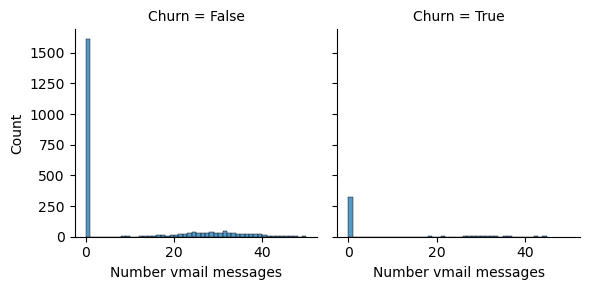

In [26]:
# faceted histogram of the feature
g = sns.FacetGrid(churn_train, col='Churn', col_wrap=2, sharex=True, sharey=True)
g.map(sns.histplot, 'Number vmail messages', binwidth=1)

Number of Voicemail Messages
- Most customers **who churned had zero voicemail messages**.
- Non-churned customers are more likely to have used voicemail at least a few times.
- The groupby table confirms this: mean voicemail usage is **lower among churned customers**.

- Having voicemail messages may indicate engagement. The opposite could indicate that the client has a lower service value perception or even disconnection.

#### Total day minutes, calls, and charge by Churn

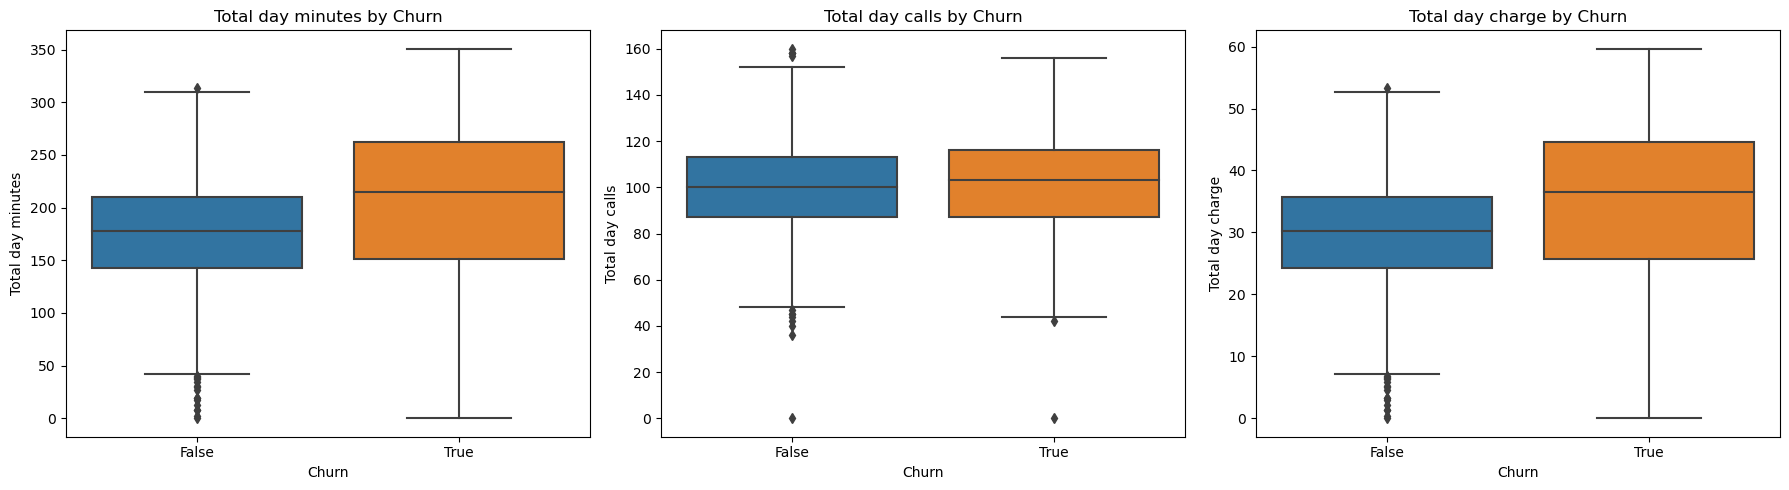

In [27]:
features = ['Total day minutes', 'Total day calls', 'Total day charge']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=churn_train, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

- **Churned customers** use more **daytime minutes** and generate **higher charges** on average.
- The **Total day calls** among retained and churned users are very simillar, indicating that number of day calls is not a churn risk factor.

Therefore, **daytime usage in terms of minutes and charges is a strong churn risk factor**.
- Customers that have longer calls and consequently are charged more tend to churn.

#### Total eve minutes, calls, and charge by Churn

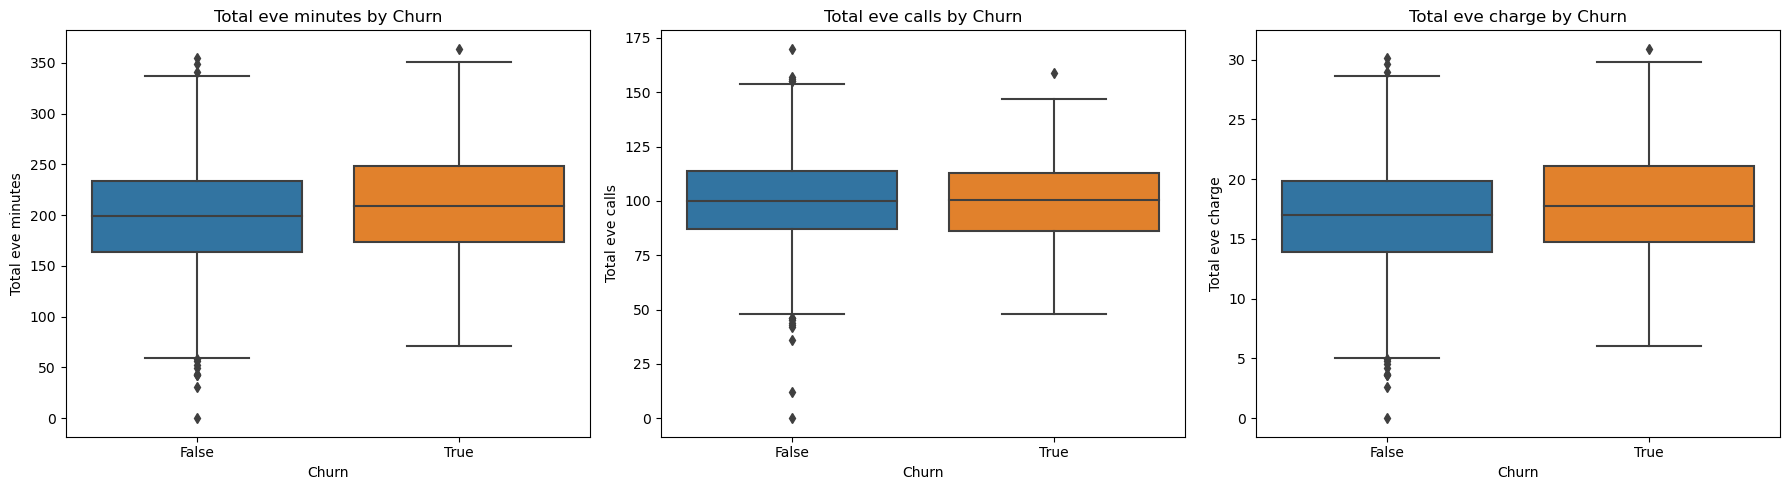

In [28]:
features = ['Total eve minutes', 'Total eve calls', 'Total eve charge']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=churn_train, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

- Differences in **evening minutes**, **calls**, and **charges** between churned and non-churned users are **minimal**.

Evening usage does **not appear to be a strong indicator** of churn.

#### Total night minutes, calls, and charge by Churn

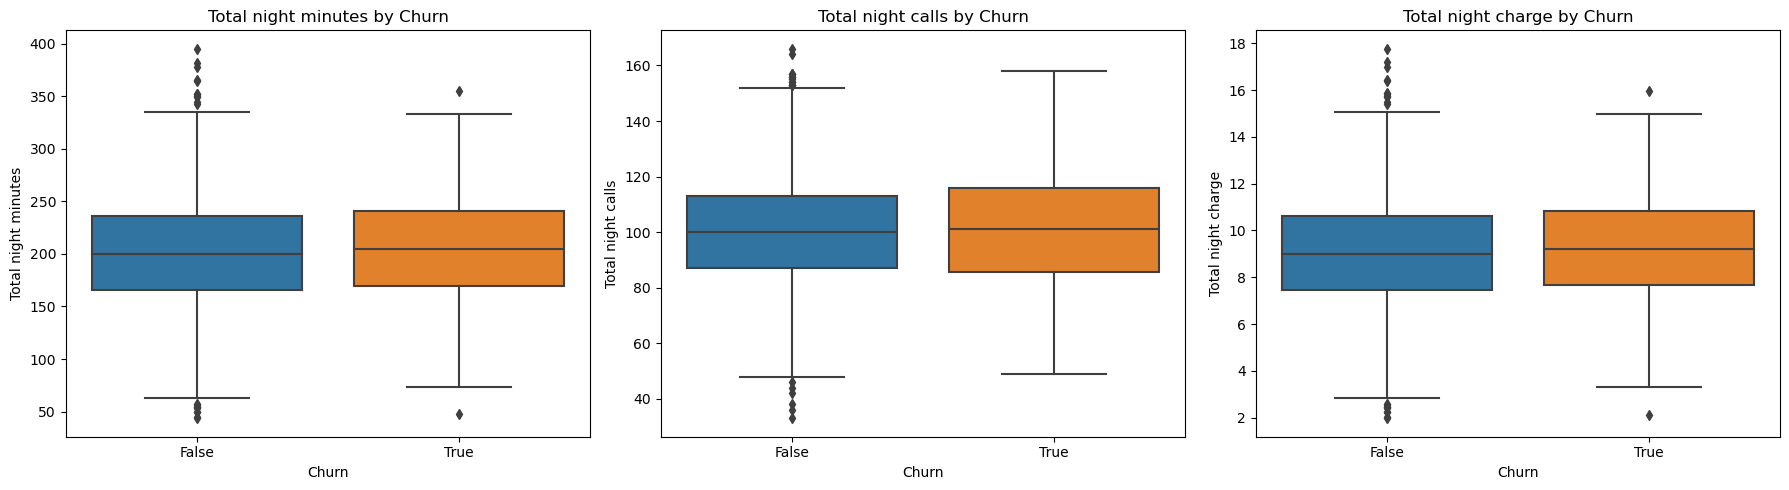

In [29]:
features = ['Total night minutes', 'Total night calls', 'Total night charge']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=churn_train, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

- Differences in **Night minutes**, **calls**, and **charges** between churned and non-churned users are **minimal**.

Nighttime usage does **not appear to be a strong indicator** of churn.

#### Total intl minutes, calls, and charge by Churn

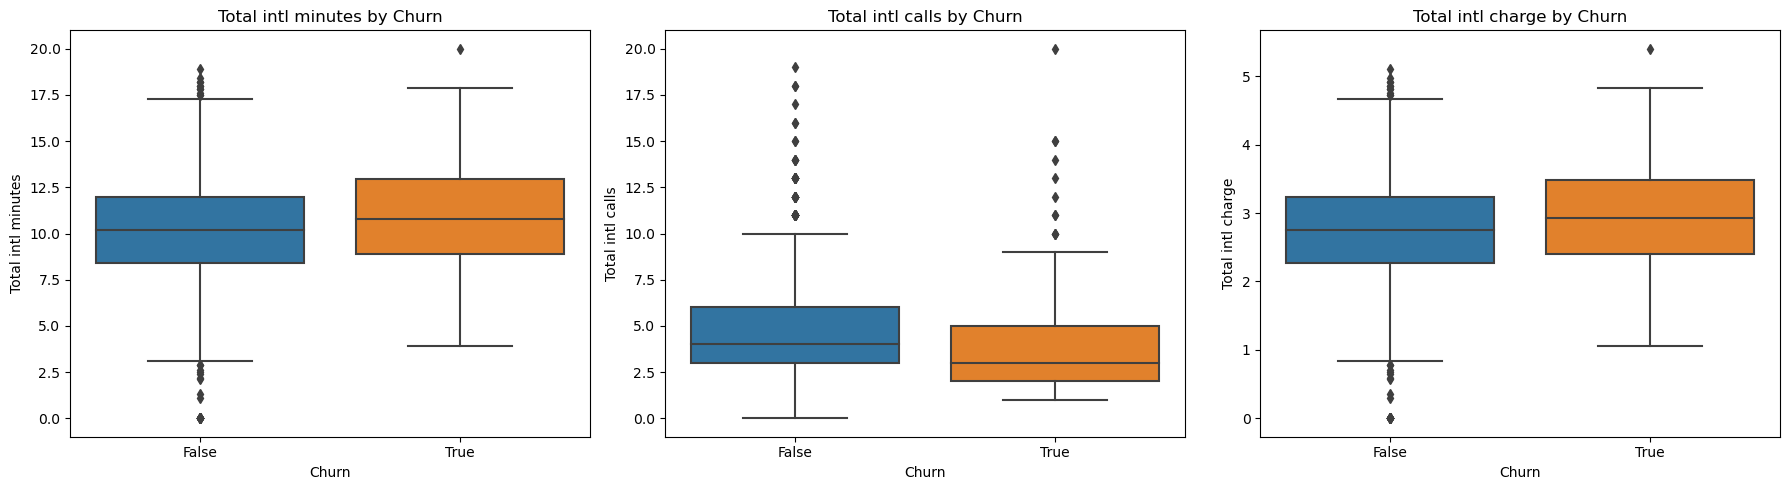

In [30]:
features = ['Total intl minutes', 'Total intl calls', 'Total intl charge']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=churn_train, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

**Churned customers** tend to:
- Have **slightly higher international minutes and charges**.
- Have **fewer international calls** on average.

However, these differences are not as strong as seen in daytime usage.

International usage shows a **light correlation with churn** but it can help identifying churn risk.

#### International plan, Voice mail plan, and Area code by Churn

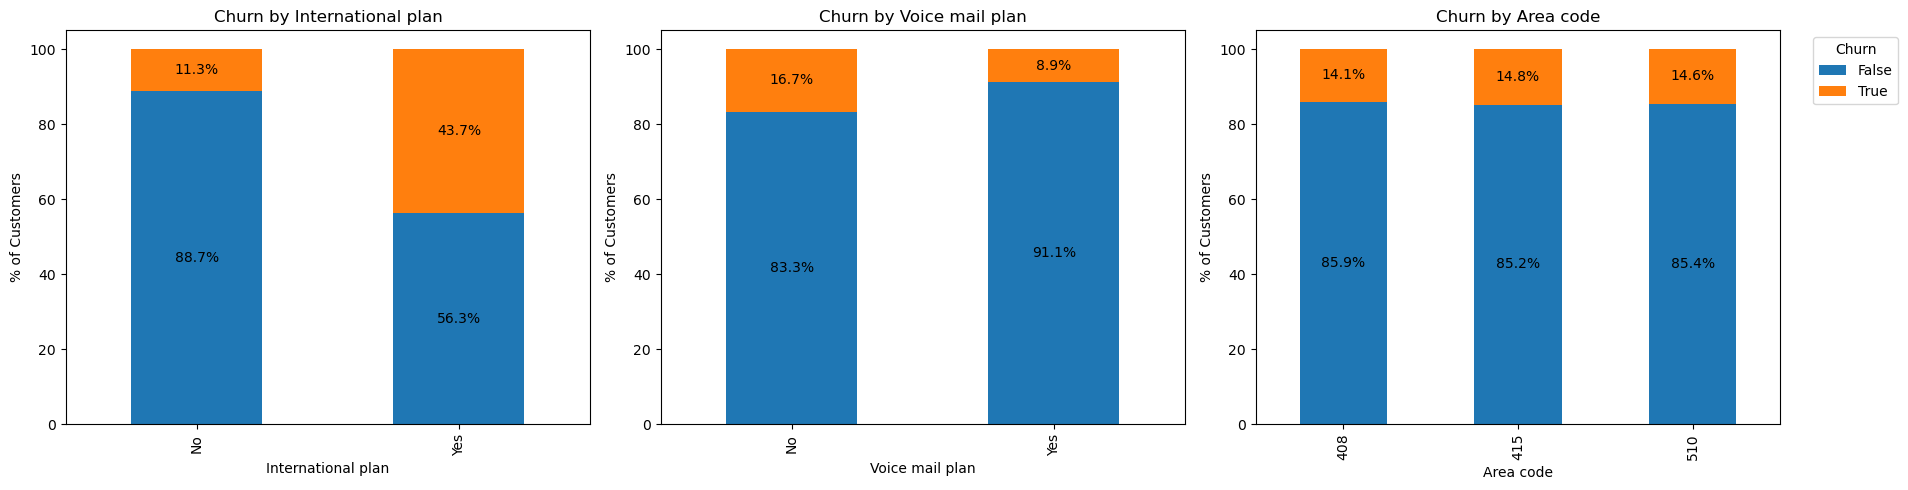

In [31]:
features = ['International plan', 'Voice mail plan', 'Area code']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    ct = pd.crosstab(churn_train[feature], churn_train['Churn'], normalize='index') * 100
    ax = ct.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    ax.set_title(f'Churn by {feature}')
    ax.set_ylabel('% of Customers')
    ax.set_xlabel(feature)
    
    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Customers **with an International Plan** churn much more than those without this plan (43.7% vs 11.3%). This is a **strong churn predictor**.
- Customers **with a Voicemail Plan** churn less than those without this plan (8.9% vs 16.7%), indicating that the Voice mail plan can sitisfy them. This is a mild churn predictor.
- **Area Code** shows **no significant difference** in churn rates. Therefore we can expect little to no geographic influence in churn.

#### State by Churn 

In [ ]:
def bar_plots(top10, bottom10, y_name):
    # function to plot the State Bar Graphs
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    # top 10
    top10.plot(kind='bar', ax=axes[0], color='mediumturquoise')
    axes[0].set_title('Top 10 States by ' + y_name)
    axes[0].set_ylabel(y_name)
    axes[0].set_ylim(0, 100)
    if y_name == 'Churn_Rate':
        axes[0].bar_label(axes[0].containers[0], fmt='%.1f%%', padding=3)
    else:
        axes[0].bar_label(axes[0].containers[0], padding=3)

    # bottom 10
    bottom10.plot(kind='bar', ax=axes[1], color='mediumturquoise')
    axes[1].set_title('Bottom 10 States by ' + y_name)
    axes[1].set_ylabel(y_name)
    axes[1].set_ylim(0, 100)
    if y_name == 'Churn_Rate':
        axes[1].bar_label(axes[1].containers[0], fmt='%.1f%%', padding=3)
    else:
        axes[1].bar_label(axes[1].containers[0], padding=3)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Count of customers per state (absolute)
state_counts = churn_train['State'].value_counts()

# Churn rate by state
state_churn = churn_train.groupby('State')['Churn'].mean() * 100

# Combine
state_summary = pd.DataFrame({
    'Churn Rate (%)': state_churn.round(1),
    'Customer Count': state_counts
})

# Sort and filter
top10 = state_summary.sort_values(by='Churn Rate (%)', ascending=False).head(10)
bottom10 = state_summary.sort_values(by='Churn Rate (%)', ascending=False).tail(10)

# Combine both for one table
combined = pd.concat([top10, bottom10]).reset_index().rename(columns={'index': 'State'})

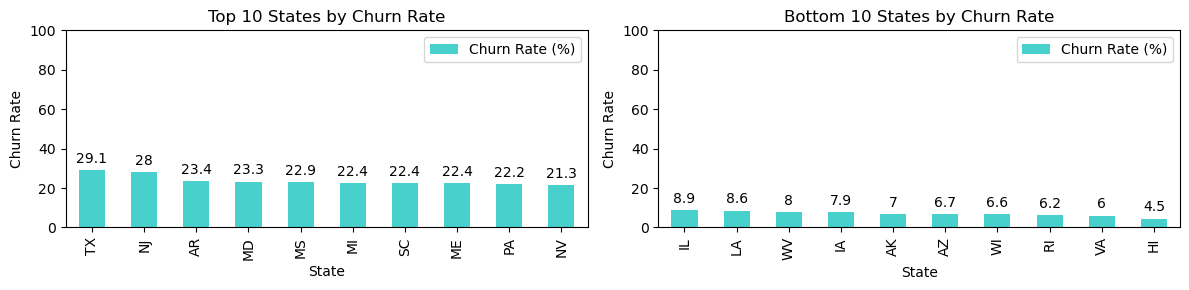

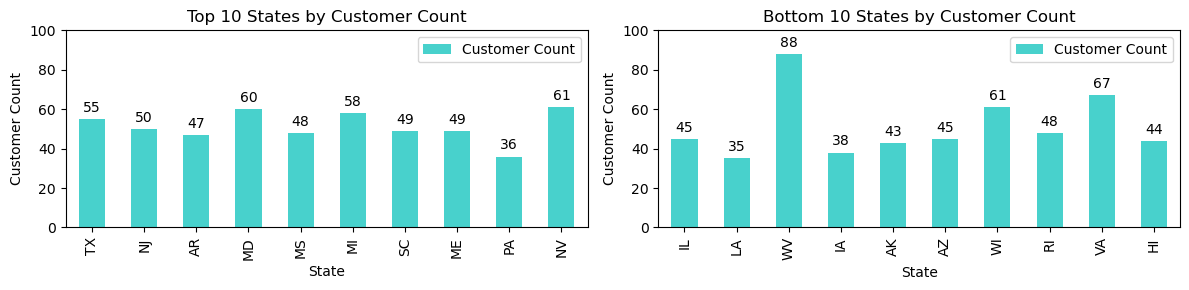

In [ ]:
# Churn Rate plot
bar_plots(top10.drop('Customer Count', axis=1), bottom10.drop('Customer Count', axis=1), 'Churn Rate')

# Customer Count plot
bar_plots(top10.drop('Churn Rate (%)', axis=1), bottom10.drop('Churn Rate (%)', axis=1), 'Customer Count')

- Churn rates vary significantly by state, from **4.5% (HI)** to **29.1% (TX)**.
- Top churn states include **TX, NJ, AR, and MD**, all above 23%. They have **moderate customer counts**, suggesting trustworthy risk areas.
- **WV** has the **largest customer base (88 customers)** and a churn rate of just **8.0%**, a probable outlier.
-**HI**, **IA** and **LA** have low churn rate, but they have **fewer than 45 customers**, making their results statistically weaker.

## Key Findings

- Customers with an **international plan** are significantly more likely to churn (**43.7% vs. 11.3%**).
- High **daytime usage** (minutes and charges) is strongly associated with churn, unlike evening or night usage.
- Customers who **contact customer service frequently** are more likely to churn, a possible signal of dissatisfaction.
- **Voicemail plan users** churn less, suggesting deeper engagement with services.
- **State-level churn rates** vary widely (4.5% to 29.1%), but are more meaningful when combined with customer volume. For example, **TX and MD** show both high churn and strong representation.

## Next Steps

- Perform **feature engineering**.
- Train, evaluate, and interpret a **classification model** to predict churn.
- Suggest **retention strategies** for high-risk customers.